Packages
=====================

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd.variable import Variable
import seaborn as sns

Import data
=====================

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train_numpy, Y_train_numpy), (X_test_numpy, Y_test_numpy) = fashion_mnist.load_data()
print(f"x_train's shape is {X_train_numpy.shape}\n x_test's shape is {X_test_numpy.shape}\n \
y_train's shape is {Y_train_numpy.shape}\n y_test's shape is {Y_test_numpy.shape}")

4423680/4422102 [==============================] - 0s 0us/step
x_train's shape is (60000, 28, 28)
 x_test's shape is (10000, 28, 28)
 y_train's shape is (60000,)
 y_test's shape is (10000,)


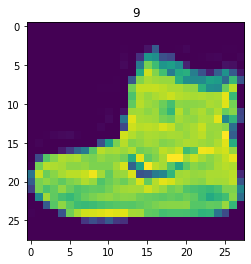

In [ ]:
def show_image(i):
    image = X_train_numpy[i]
    plt.imshow(image)
    plt.title(Y_train_numpy[i])
    plt.show()
show_image(0)

In [ ]:
X_train = torch.div(torch.from_numpy(X_train_numpy).type(torch.FloatTensor), 127.5)[0:10000].cuda() - 1
# X_test = torch.div(torch.from_numpy(X_test_numpy).type(torch.FloatTensor), 127.5).cuda() - 1
# Y_train = torch.from_numpy(Y_train_numpy).type(torch.long)[0:10000]
# Y_test = torch.from_numpy(Y_test_numpy).type(torch.long).cuda()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  """Entry point for launching an IPython kernel.


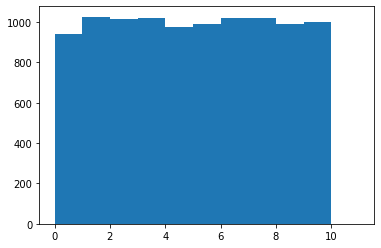

In [ ]:
plt.hist(Y_train_numpy[0:10000], bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.show()

Discriminator
====================

In [ ]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(OrderedDict([
            # hidden layer 1
            ('fc1', nn.Linear(28 * 28, 1024)),
            ('rl1', nn.LeakyReLU(0.2)),
            ('dt1', nn.Dropout(0.2)),

            # hidden layer 2
            ('fc2', nn.Linear(1024, 512)),
            ('rl2', nn.LeakyReLU(0.2)),
            ('dt2', nn.Dropout(0.2)),

            # hidden layer 3
            ('fc3', nn.Linear(512, 256)),
            ('rl3', nn.LeakyReLU(0.2)),
            ('dt3', nn.Dropout(0.2)),

            # out layer
            ('fc4', nn.Linear(256, 1)),
            ('sg1', nn.Sigmoid())
        ]))
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.model(x)
        return x

Generator
================
use noisy vectors to ignite whose shape is (N, 100)    
(N, 100) in image out  
N is batch_size, the number of all pictures

In [ ]:
class Generator(torch.nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(OrderedDict([
            # hidden layer 1
            ('fc1', nn.Linear(100, 256)),
            ('rl1', nn.LeakyReLU(0.2)),

            # hidden layer 2
            ('fc2', nn.Linear(256, 512)),
            ('rl2', nn.LeakyReLU(0.2)),

            # hidden layer 3
            ('fc3', nn.Linear(512, 1024)),
            ('rl3', nn.LeakyReLU(0.2)),

            # out layer
            ('fc4', nn.Linear(1024, 28 * 28)),
            ('th1', nn.Tanh())
        ]))

    def vec2img(self, x):
        return x.view(x.size()[0], 1, 28, 28)

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

    def forward(self, x):
        x = self.model(x)
        x = self.vec2img(x)
        return x

Implement
=========================

instance
---------------

In [ ]:
discriminator = Discriminator().cuda()
generator = Generator().cuda()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr = 0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr = 0.0002)

loss function
---------------------

In [ ]:
loss_function = nn.BCELoss()

noise
---------------------

In [ ]:
def noise(size):
    return Variable(torch.randn(size, 100)).cuda()

parameters
----------------

In [ ]:
epochs = 40000

execute
-----------------

In [ ]:
def show_generate_image(x_torch):
    x = x_torch[0:8, 0:1, 0:28, 0:28].cpu().detach().numpy().reshape((8, 28, 28))
    fig, ax = plt.subplots(1, 8, figsize=(17,17))
    for i, img in enumerate(x):
        ax[i].imshow(img)
    plt.show()

epoch is 999: discriminator loss is         0.024917771108448505, generator loss is 6.365356922149658


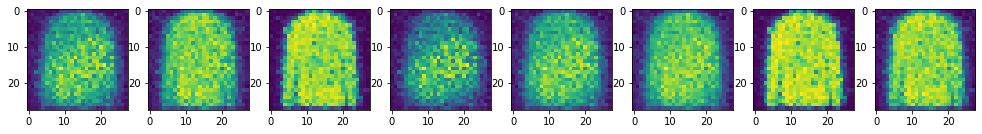

epoch is 1999: discriminator loss is         0.07052576169371605, generator loss is 6.950581073760986


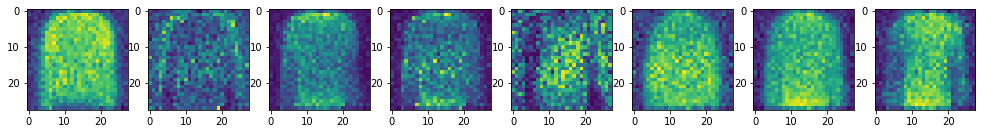

epoch is 2999: discriminator loss is         0.23643339425325394, generator loss is 4.145434379577637


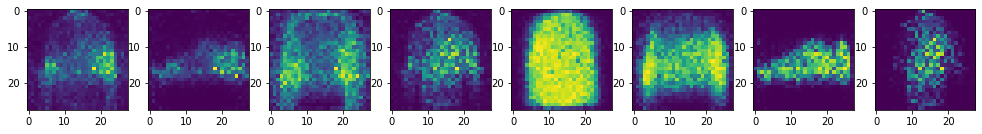

epoch is 3999: discriminator loss is         0.11680736020207405, generator loss is 5.967962741851807


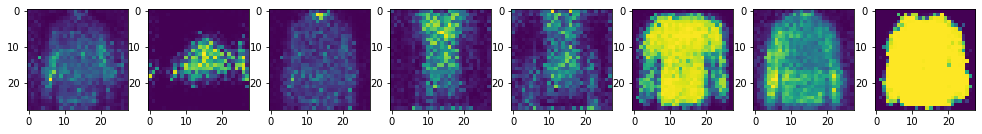

epoch is 4999: discriminator loss is         0.22865081578493118, generator loss is 5.990938186645508


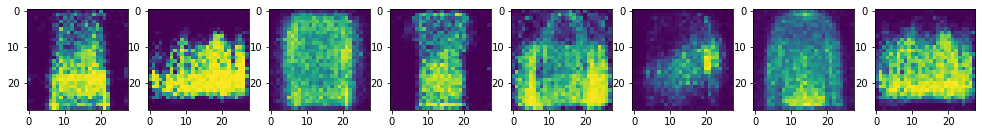

epoch is 5999: discriminator loss is         0.1422737017273903, generator loss is 6.020819187164307


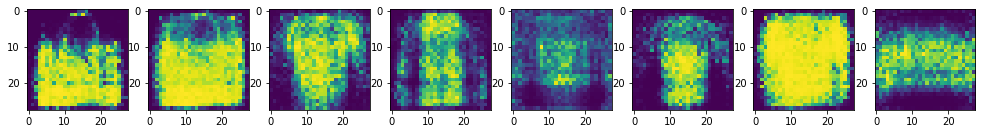

epoch is 6999: discriminator loss is         0.15120787173509598, generator loss is 5.5370774269104


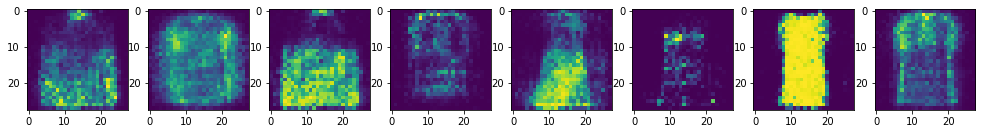

epoch is 7999: discriminator loss is         0.17237844318151474, generator loss is 5.887411594390869


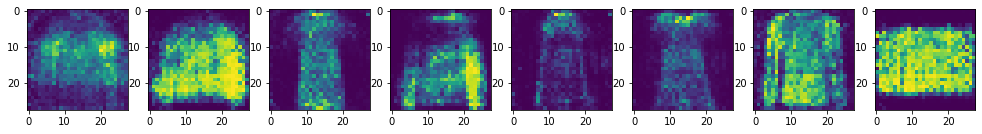

epoch is 8999: discriminator loss is         0.1738039329648018, generator loss is 5.573487758636475


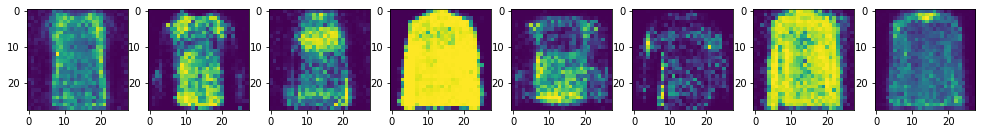

epoch is 9999: discriminator loss is         0.14302754402160645, generator loss is 6.374120235443115


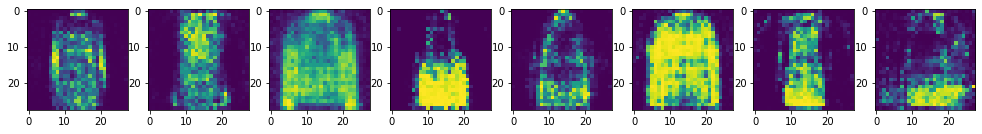

epoch is 10999: discriminator loss is         0.19676753878593445, generator loss is 5.6241068840026855


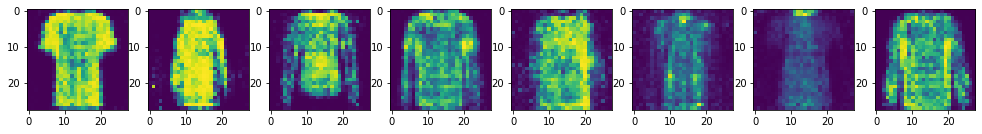

epoch is 11999: discriminator loss is         0.17726093530654907, generator loss is 5.716526508331299


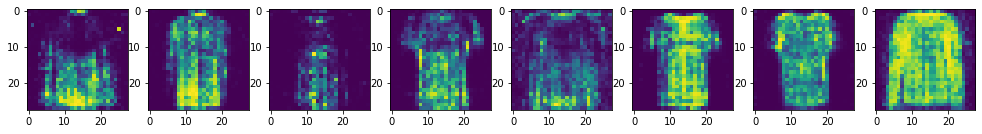

epoch is 12999: discriminator loss is         0.17936298251152039, generator loss is 5.306393623352051


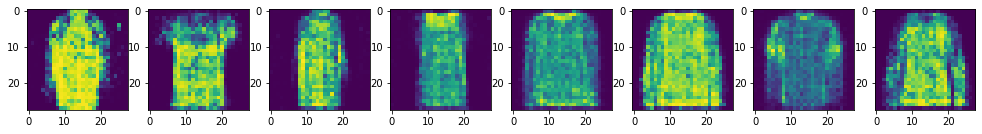

epoch is 13999: discriminator loss is         0.25133664160966873, generator loss is 4.791946887969971


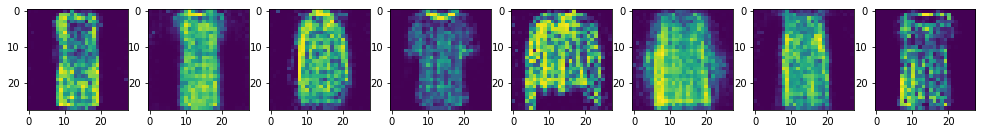

epoch is 14999: discriminator loss is         0.25878652185201645, generator loss is 4.84883975982666


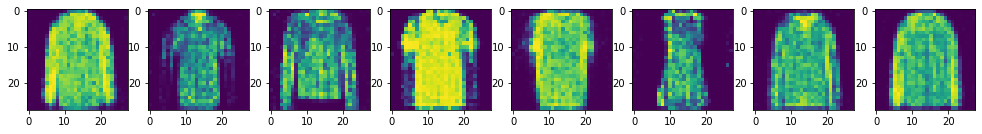

epoch is 15999: discriminator loss is         0.3278258740901947, generator loss is 4.328985214233398


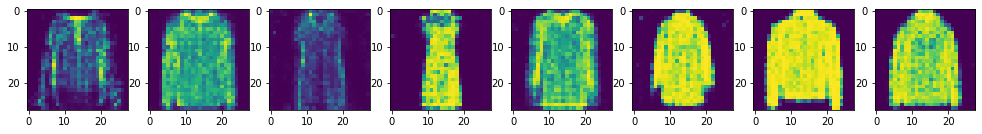

epoch is 16999: discriminator loss is         0.2996111363172531, generator loss is 4.289483547210693


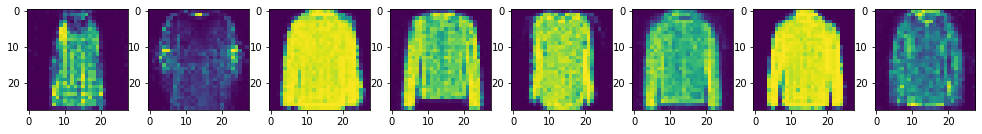

epoch is 17999: discriminator loss is         0.3487268090248108, generator loss is 3.8046538829803467


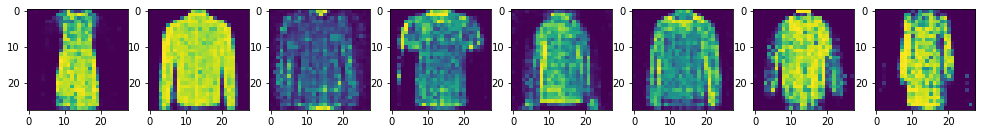

epoch is 18999: discriminator loss is         0.3458520174026489, generator loss is 4.1974592208862305


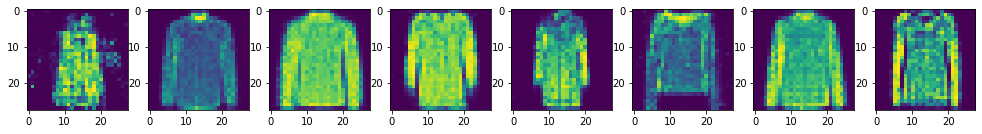

epoch is 19999: discriminator loss is         0.2732837349176407, generator loss is 4.361177444458008


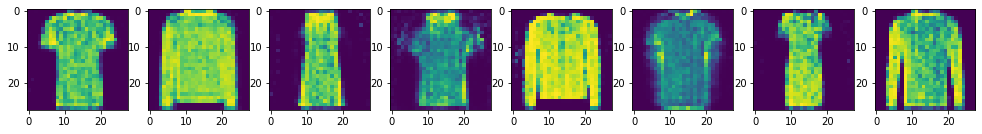

epoch is 20999: discriminator loss is         0.3340565264225006, generator loss is 4.1459832191467285


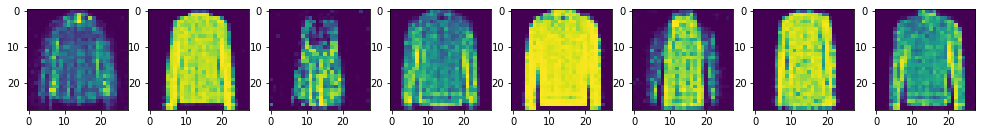

epoch is 21999: discriminator loss is         0.27962201833724976, generator loss is 4.401902198791504


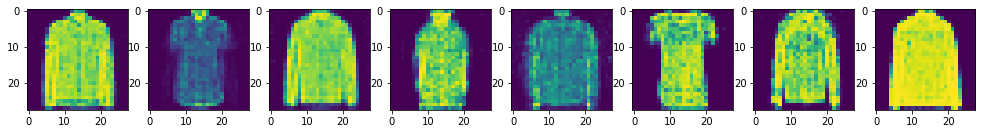

epoch is 22999: discriminator loss is         0.32652102410793304, generator loss is 3.982522487640381


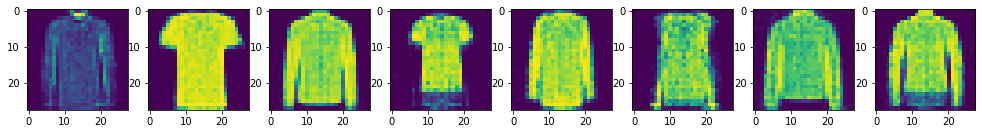

epoch is 23999: discriminator loss is         0.3426193445920944, generator loss is 4.018801689147949


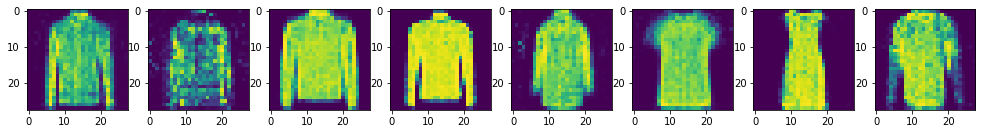

epoch is 24999: discriminator loss is         0.2948194742202759, generator loss is 4.0039544105529785


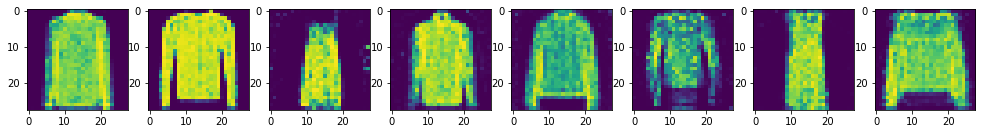

epoch is 25999: discriminator loss is         0.28299887478351593, generator loss is 4.187852382659912


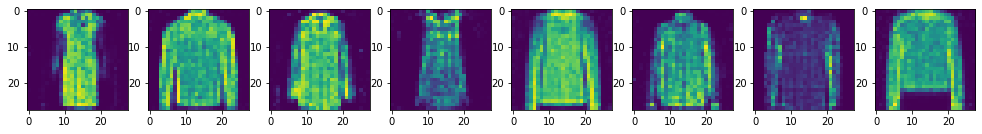

epoch is 26999: discriminator loss is         0.27262043952941895, generator loss is 4.528661251068115


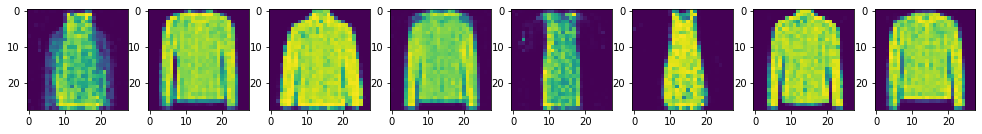

epoch is 27999: discriminator loss is         0.22358506172895432, generator loss is 4.858822822570801


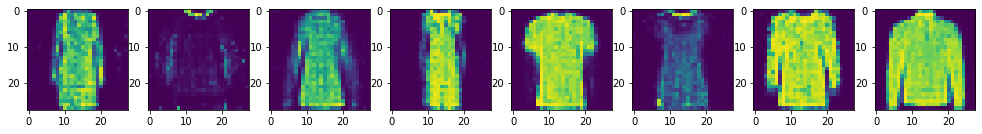

epoch is 28999: discriminator loss is         0.27464592456817627, generator loss is 4.588708877563477


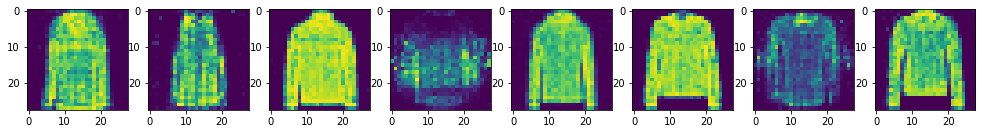

epoch is 29999: discriminator loss is         0.1940857544541359, generator loss is 5.34104061126709


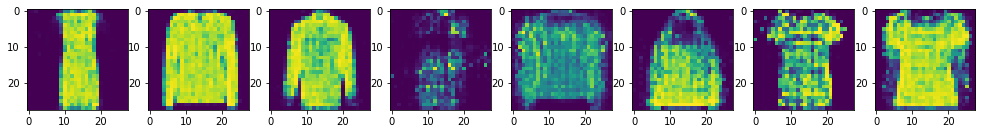

epoch is 30999: discriminator loss is         0.2626767158508301, generator loss is 5.297170162200928


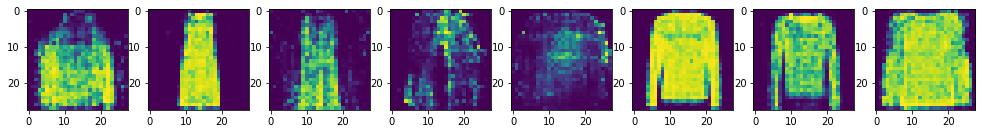

epoch is 31999: discriminator loss is         0.197302907705307, generator loss is 5.780529499053955


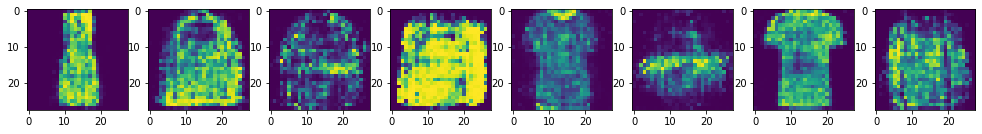

epoch is 32999: discriminator loss is         0.1492539495229721, generator loss is 5.826660633087158


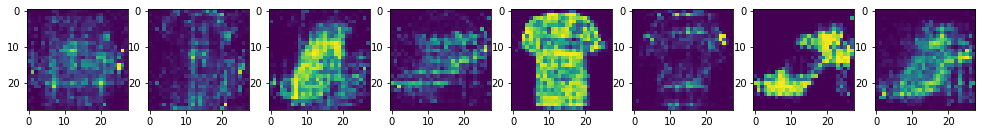

epoch is 33999: discriminator loss is         0.15376252681016922, generator loss is 6.352202415466309


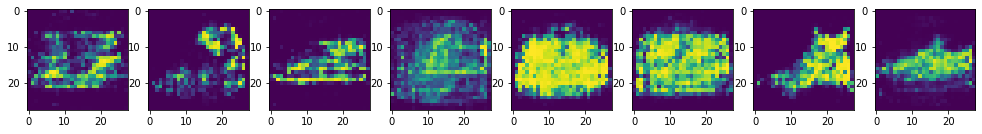

epoch is 34999: discriminator loss is         0.17505955696105957, generator loss is 4.9853692054748535


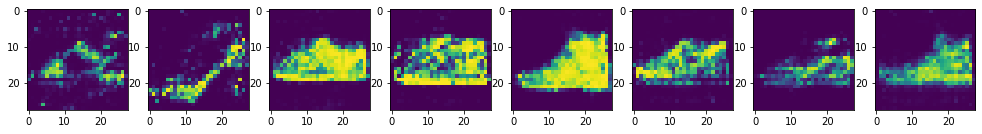

epoch is 35999: discriminator loss is         0.20970633625984192, generator loss is 5.043307781219482


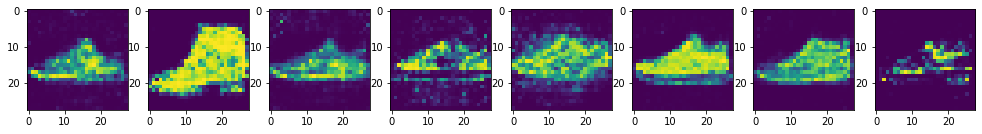

epoch is 36999: discriminator loss is         0.17953182011842728, generator loss is 5.06278133392334


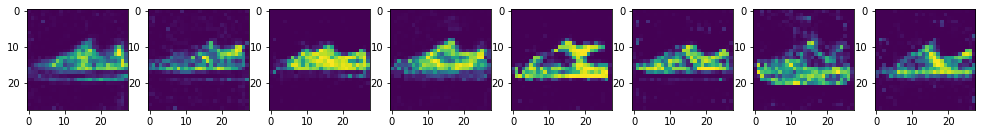

epoch is 37999: discriminator loss is         0.1867077499628067, generator loss is 5.232382774353027


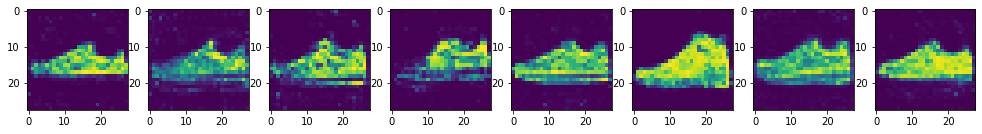

epoch is 38999: discriminator loss is         0.15110324695706367, generator loss is 5.234952449798584


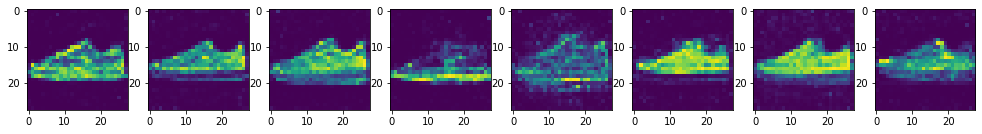

epoch is 39999: discriminator loss is         0.1511283740401268, generator loss is 5.451496601104736


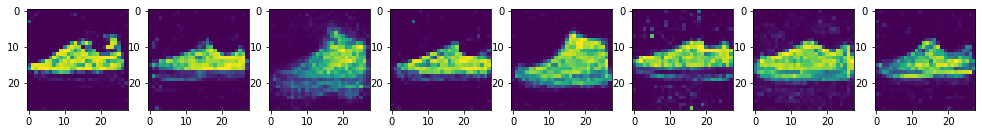

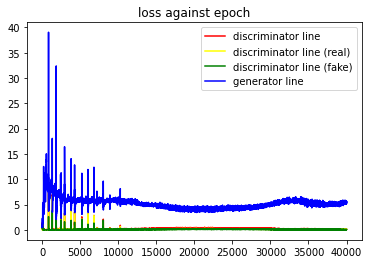

In [ ]:
from tqdm.notebook import tnrange, tqdm_notebook

epoch_list = []
dis_list = []
gen_list = []
dis_real_list = []
dis_fake_list = []

for epoch in tnrange(epochs):
    N = X_train.size()[0] # number of all train image

    # feed generator with noise
    fake = generator(noise(N)).detach() # fake is a image
    
    # train discriminator
    # train real data
    discriminator_optimizer.zero_grad()
    pred_real = discriminator(X_train) 
    loss_real = loss_function(pred_real, torch.ones(N, 1).cuda())
    loss_real.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()
    # train fake data
    discriminator_optimizer.zero_grad()
    pred_fake = discriminator(fake)
    loss_fake = loss_function(pred_fake, torch.zeros(N, 1).cuda())
    loss_fake.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()

    # train generator
    fake = generator(noise(N))
    generator_optimizer.zero_grad()
    pred = discriminator(fake)
    loss = loss_function(pred, torch.ones(N, 1).cuda())
    loss.backward()
    generator_optimizer.step()
    generator_optimizer.zero_grad()

    epoch_list.append(epoch)
    dis_list.append(loss_fake.item() + loss_real.item())
    dis_real_list.append(loss_real.item())
    dis_fake_list.append(loss_fake.item())
    gen_list.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f"epoch is {epoch}: discriminator loss is \
        {loss_fake.item() + loss_real.item()}, generator loss is {loss.item()}")
        show_generate_image(generator(noise(8)))
    

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=dis_list, color='red', label='discriminator line', ax=ax)
sns.lineplot(x=epoch_list, y=dis_real_list, color='yellow', label='discriminator line (real)', ax=ax)
sns.lineplot(x=epoch_list, y=dis_fake_list, color='green', label='discriminator line (fake)', ax=ax)
sns.lineplot(x=epoch_list, y=gen_list, color='blue', label='generator line', ax=ax)
plt.title(f"loss against epoch")
plt.show()


Implement two generator
============================

instance
----------------------

In [ ]:
discriminator = Discriminator().cuda()
generator = Generator().cuda()
generator_neverupdate = Generator().cuda()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr = 0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr = 0.0002)

loss function
-------------------

In [ ]:
loss_function = nn.BCELoss()

noisy
-------------------

In [ ]:
def noise(size):
    return Variable(torch.randn(size, 100)).cuda()

parameters
---------------------

In [ ]:
epochs = 40000

execute
----------------------

In [ ]:
def show_generate_image(x_torch):
    x = x_torch[0:8, 0:1, 0:28, 0:28].cpu().detach().numpy().reshape((8, 28, 28))
    fig, ax = plt.subplots(1, 8, figsize=(17,17))
    for i, img in enumerate(x):
        ax[i].imshow(img)
    plt.show()

epoch is 999: discriminator loss is         0.2149405066993495, generator loss is 12.11770248413086


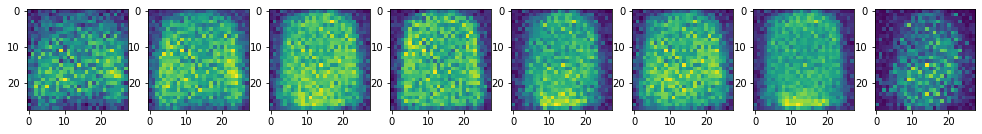

epoch is 1999: discriminator loss is         0.1030871570110321, generator loss is 6.998537540435791


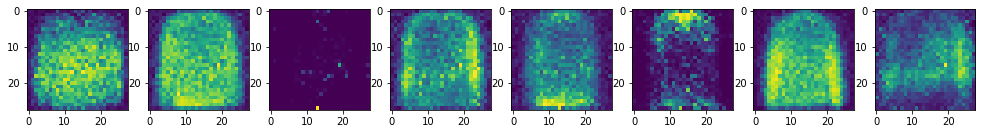

epoch is 2999: discriminator loss is         0.11022857949137688, generator loss is 6.195509433746338


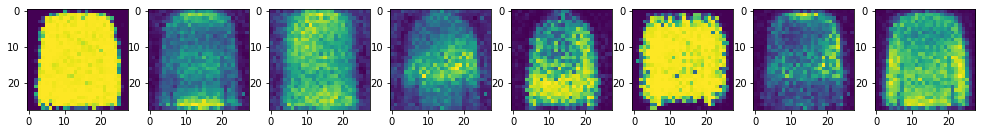

epoch is 3999: discriminator loss is         0.0976264700293541, generator loss is 6.990787982940674


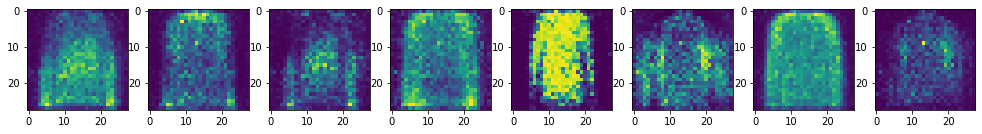

epoch is 4999: discriminator loss is         0.10648700222373009, generator loss is 6.311378002166748


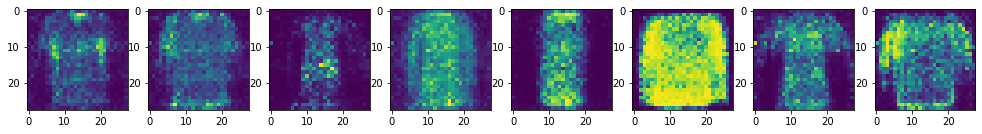

epoch is 5999: discriminator loss is         0.1373462863266468, generator loss is 6.401892185211182


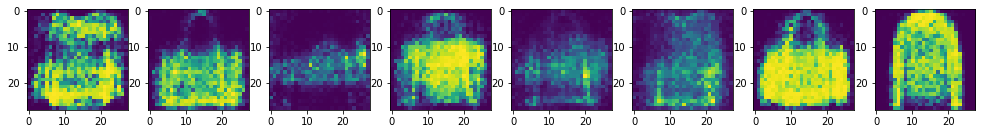

epoch is 6999: discriminator loss is         0.22693631798028946, generator loss is 5.741896629333496


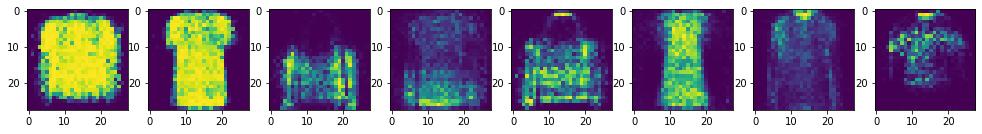

epoch is 7999: discriminator loss is         0.16398198157548904, generator loss is 5.728822708129883


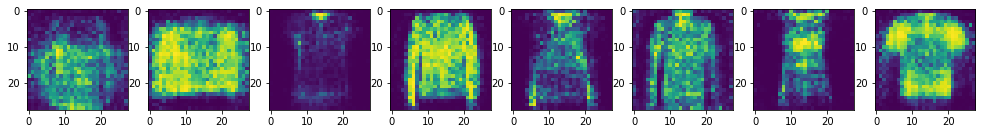

epoch is 8999: discriminator loss is         0.1209874078631401, generator loss is 6.126845836639404


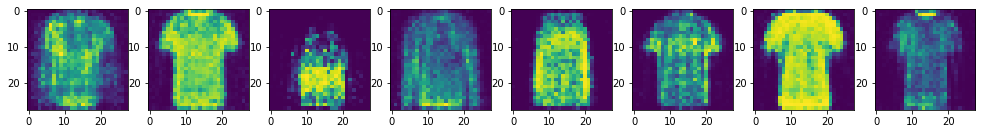

epoch is 9999: discriminator loss is         0.19324460625648499, generator loss is 5.453631401062012


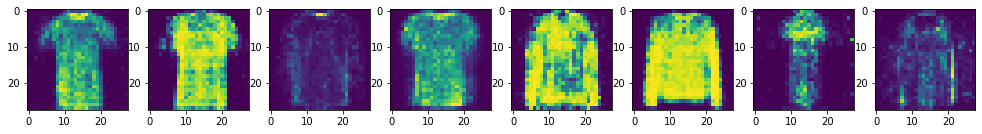

epoch is 10999: discriminator loss is         0.17791040986776352, generator loss is 5.44425630569458


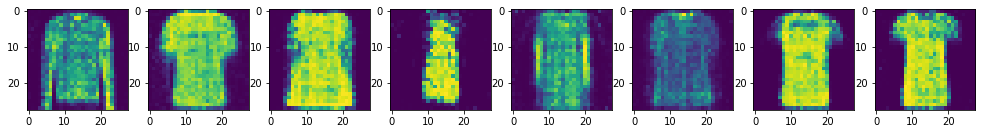

epoch is 11999: discriminator loss is         0.17673878371715546, generator loss is 4.904081344604492


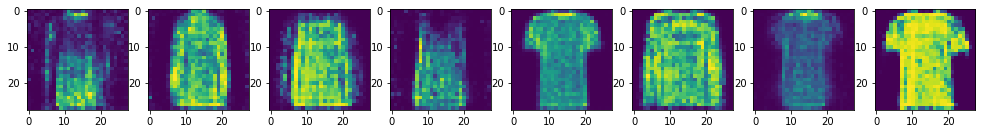

epoch is 12999: discriminator loss is         0.34338927268981934, generator loss is 4.66227388381958


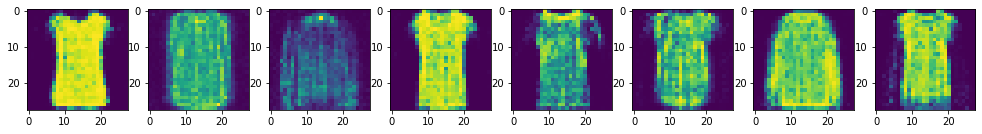

epoch is 13999: discriminator loss is         0.19730612635612488, generator loss is 5.037943363189697


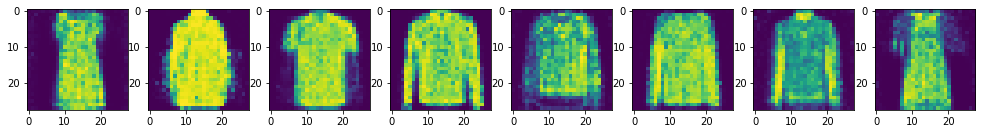

epoch is 14999: discriminator loss is         0.3952878415584564, generator loss is 4.0265212059021


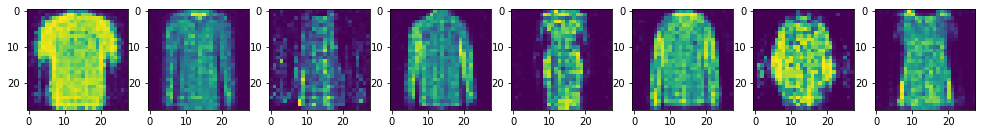

epoch is 15999: discriminator loss is         0.4552072584629059, generator loss is 3.7706339359283447


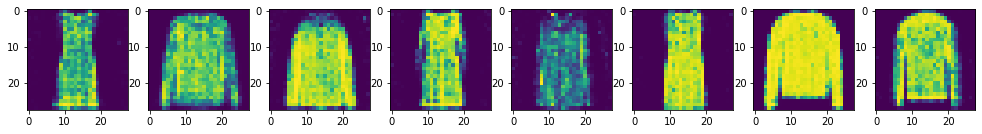

epoch is 16999: discriminator loss is         0.31775689125061035, generator loss is 4.21128511428833


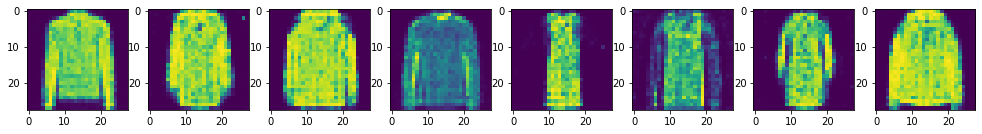

epoch is 17999: discriminator loss is         0.2543414384126663, generator loss is 4.775694370269775


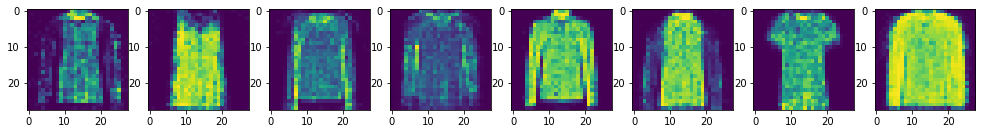

epoch is 18999: discriminator loss is         0.2517005503177643, generator loss is 4.377266883850098


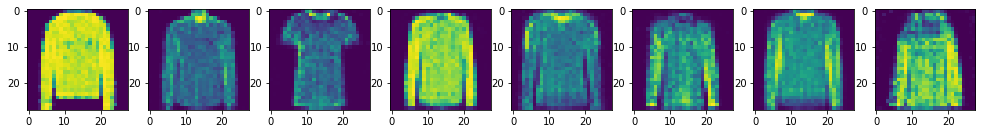

epoch is 19999: discriminator loss is         0.3207660913467407, generator loss is 4.214114189147949


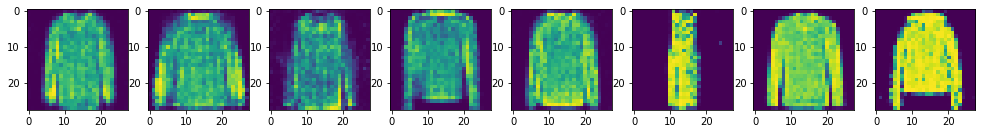

epoch is 20999: discriminator loss is         0.2537170425057411, generator loss is 4.381072521209717


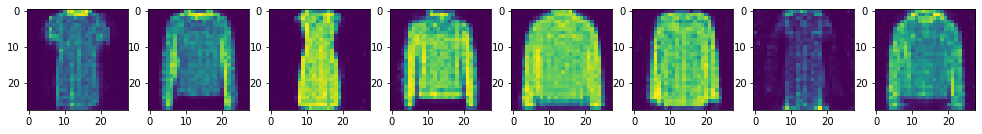

epoch is 21999: discriminator loss is         0.2860343009233475, generator loss is 4.269473552703857


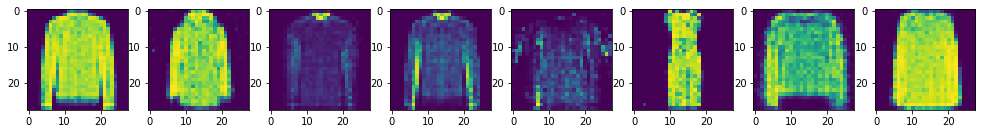

epoch is 22999: discriminator loss is         0.40091370046138763, generator loss is 3.78204607963562


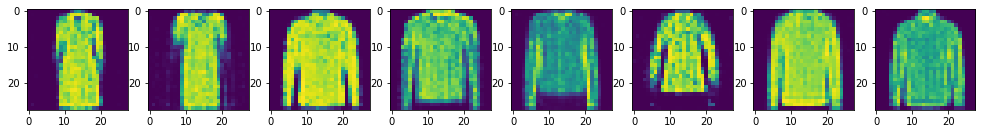

epoch is 23999: discriminator loss is         0.22374800592660904, generator loss is 4.788163185119629


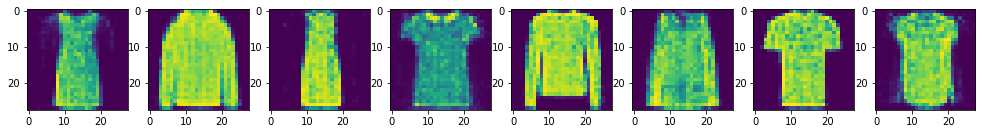

epoch is 24999: discriminator loss is         0.2896703779697418, generator loss is 4.454476833343506


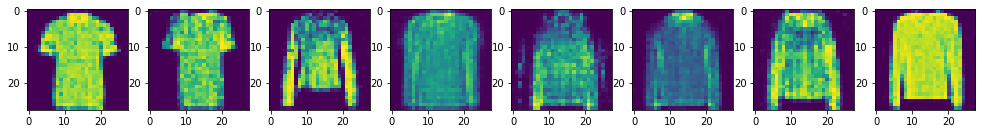

epoch is 25999: discriminator loss is         0.25630810111761093, generator loss is 4.552789688110352


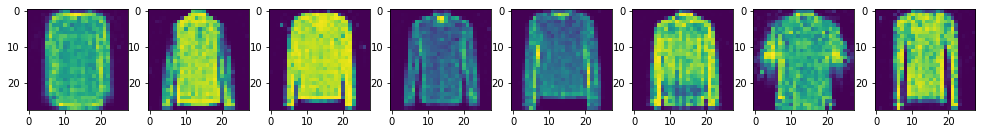

epoch is 26999: discriminator loss is         0.30468302965164185, generator loss is 4.499361991882324


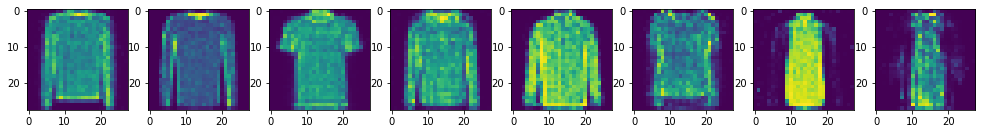

epoch is 27999: discriminator loss is         0.25557174533605576, generator loss is 4.581676006317139


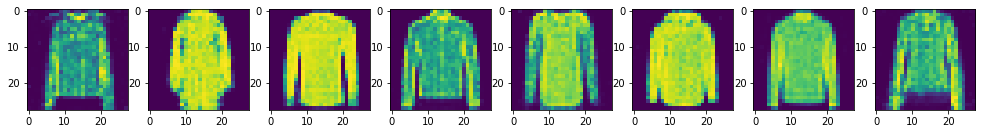

epoch is 28999: discriminator loss is         0.24408017098903656, generator loss is 4.890728950500488


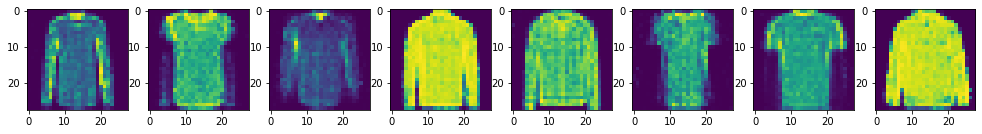

epoch is 29999: discriminator loss is         0.208700530230999, generator loss is 4.837490558624268


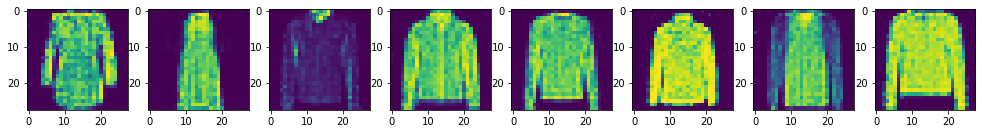

epoch is 30999: discriminator loss is         0.2135811746120453, generator loss is 5.2238969802856445


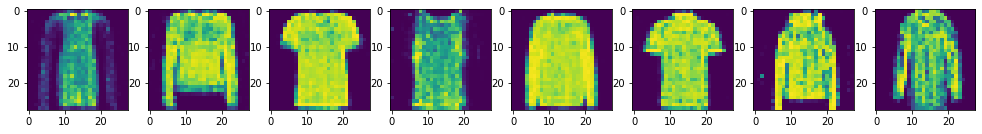

epoch is 31999: discriminator loss is         0.2161797434091568, generator loss is 5.14892053604126


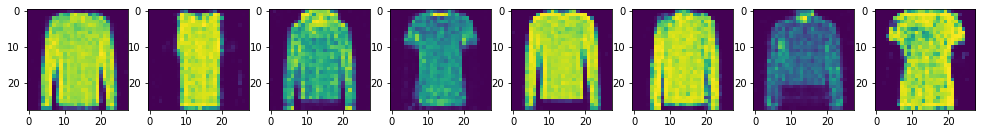

epoch is 32999: discriminator loss is         0.24096213281154633, generator loss is 5.229679584503174


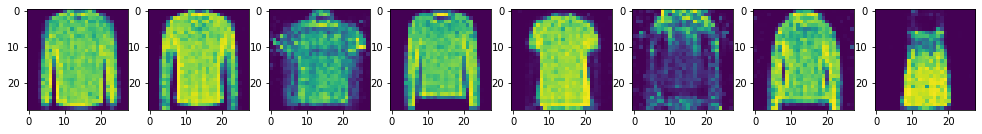

epoch is 33999: discriminator loss is         0.21536914259195328, generator loss is 5.397177219390869


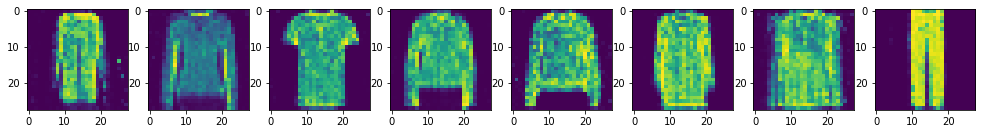

epoch is 34999: discriminator loss is         0.188202902674675, generator loss is 5.471238136291504


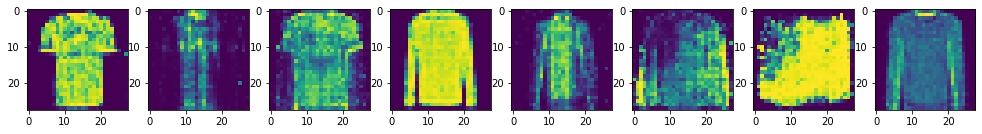

epoch is 35999: discriminator loss is         0.29560616612434387, generator loss is 5.312538146972656


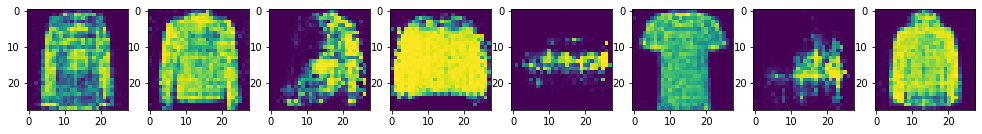

epoch is 36999: discriminator loss is         0.1883610039949417, generator loss is 5.752288818359375


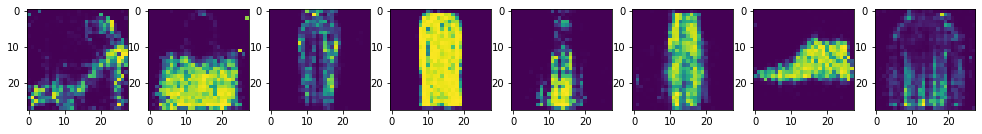

epoch is 37999: discriminator loss is         0.1492987647652626, generator loss is 6.0207600593566895


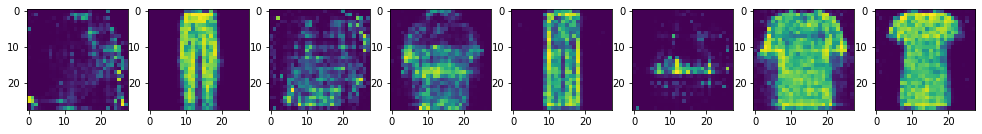

epoch is 38999: discriminator loss is         0.2446945533156395, generator loss is 5.3603668212890625


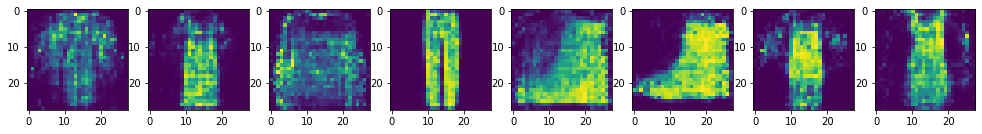

epoch is 39999: discriminator loss is         0.19732071459293365, generator loss is 5.360947132110596


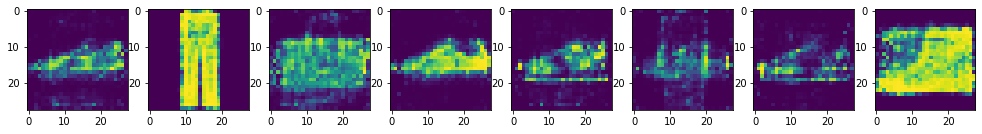

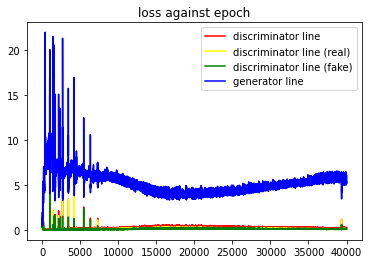

In [ ]:
from tqdm.notebook import tnrange, tqdm_notebook

epoch_list = []
dis_list = []
gen_list = []
dis_real_list = []
dis_fake_list = []

for epoch in tnrange(epochs):
    N = X_train.size()[0] # number of all train image
    
    # train discriminator
    # train real data
    discriminator_optimizer.zero_grad()
    pred_real = discriminator(X_train) 
    loss_real = loss_function(pred_real, torch.ones(N, 1).cuda())
    loss_real.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()
    # train fake data
    fake = generator(noise(N)).detach() # fake is a image
    discriminator_optimizer.zero_grad()
    pred_fake = discriminator(fake)
    loss_fake = loss_function(pred_fake, torch.zeros(N, 1).cuda())
    loss_fake.backward()
    discriminator_optimizer.step()
    discriminator_optimizer.zero_grad()

    # train generator
    fake = generator(noise(N))
    generator_optimizer.zero_grad()
    pred = discriminator(fake)
    loss = loss_function(pred, torch.ones(N, 1).cuda())
    loss.backward()
    generator_optimizer.step()
    generator_optimizer.zero_grad()

    epoch_list.append(epoch)
    dis_list.append(loss_fake.item() + loss_real.item())
    dis_real_list.append(loss_real.item())
    dis_fake_list.append(loss_fake.item())
    gen_list.append(loss.item())

    if (epoch + 1) % 1000 == 0:
        print(f"epoch is {epoch}: discriminator loss is \
        {loss_fake.item() + loss_real.item()}, generator loss is {loss.item()}")
        show_generate_image(generator(noise(8)))
    

fig, ax = plt.subplots()
sns.lineplot(x=epoch_list, y=dis_list, color='red', label='discriminator line', ax=ax)
sns.lineplot(x=epoch_list, y=dis_real_list, color='yellow', label='discriminator line (real)', ax=ax)
sns.lineplot(x=epoch_list, y=dis_fake_list, color='green', label='discriminator line (fake)', ax=ax)
sns.lineplot(x=epoch_list, y=gen_list, color='blue', label='generator line', ax=ax)
plt.title(f"loss against epoch")
plt.show()
